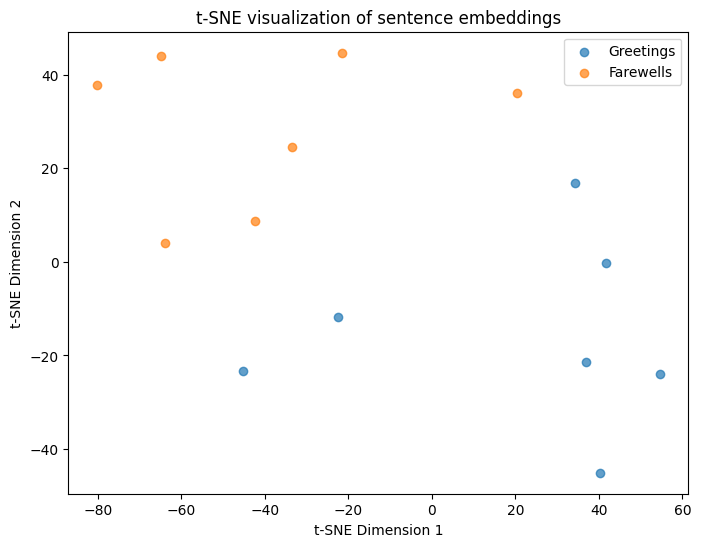

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer

# Define the dataset
greetings = [
    "Hello, how are you?",
    "Good morning! Hope you're doing well.",
    "Hey there! Nice to see you.",
    "Hi! What's up?",
    "Good afternoon, how's your day going?",
    "Hello! Long time no see.",
    "Hey! How have you been?"
]

farewells = [
    "Goodbye! See you soon.",
    "Take care! Have a great day.",
    "Bye! Talk to you later.",
    "See you tomorrow!",
    "Farewell, my friend.",
    "Goodnight! Sleep well.",
    "See you next time!"
]

# Combine sentences and create labels
sentences = greetings + farewells
labels = [0] * len(greetings) + [1] * len(farewells)  # 0: Greetings, 1: Farewells

# Load embedding model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Compute embeddings
embeddings = model.encode(sentences)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the clusters
plt.figure(figsize=(8, 6))
for i, label in enumerate(set(labels)):
    idx = np.array(labels) == label
    plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], label="Greetings" if label == 0 else "Farewells", alpha=0.7)

plt.legend()
plt.title("t-SNE visualization of sentence embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()
